In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('games.csv')

# Encode the target (winner: white or black)
label_encoder = LabelEncoder()
data['winner_encoded'] = label_encoder.fit_transform(data['winner'])

# One-hot encode 'victory_status'
data = pd.get_dummies(data, columns=['victory_status'], drop_first=True)

# Prepare the feature set and target variable
X = data[['white_rating', 'black_rating', 'turns', 'victory_status_mate', 'victory_status_outoftime', 'victory_status_resign']]
y = data['winner_encoded']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.619807244931871


In [3]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree with Gini Index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [4]:
# Train Decision Tree with Entropy (Information Gain)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [5]:
from sklearn.metrics import accuracy_score

# Gini Index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Entropy (Information Gain)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print(f"Accuracy using Gini Index: {accuracy_gini}")
print(f"Accuracy using Entropy: {accuracy_entropy}")


Accuracy using Gini Index: 0.619807244931871
Accuracy using Entropy: 0.6402459288800266


Accuracy using Gini Index: 0.619807244931871
Accuracy using Entropy: 0.6402459288800266


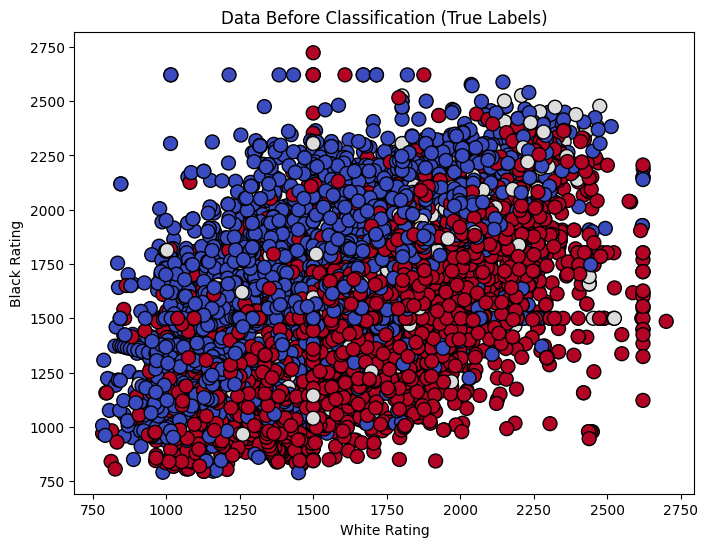

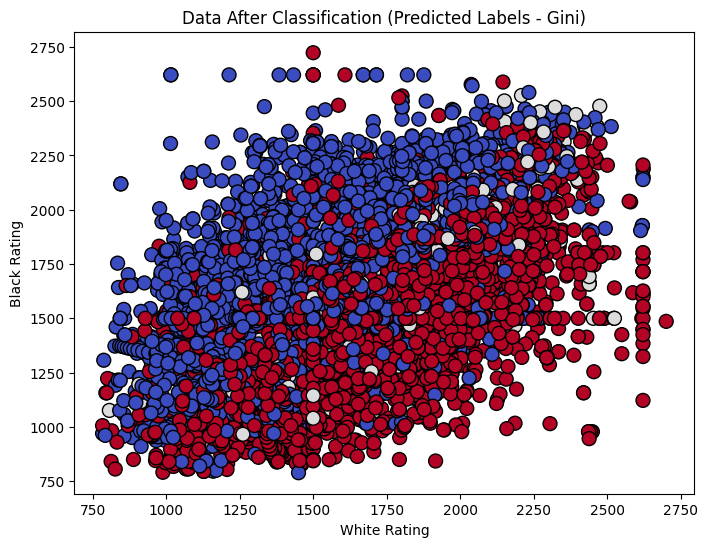

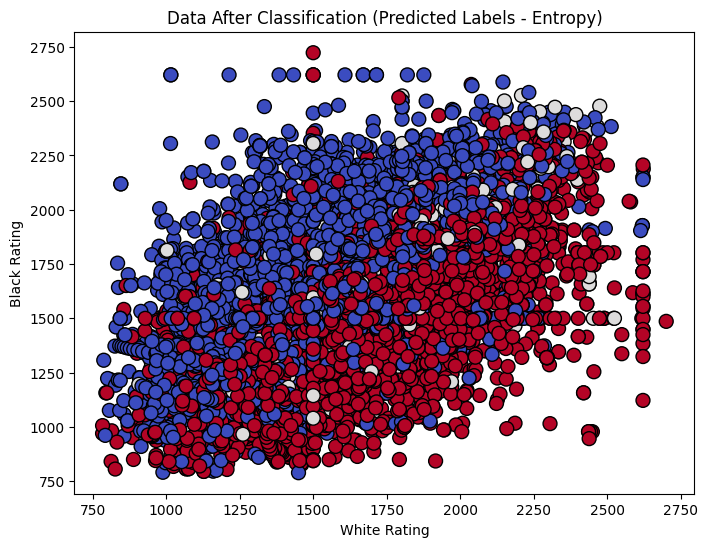

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('games.csv')

# Encode the target (winner: white or black)
label_encoder = LabelEncoder()
data['winner_encoded'] = label_encoder.fit_transform(data['winner'])

# One-hot encode 'victory_status'
data = pd.get_dummies(data, columns=['victory_status'], drop_first=True)

# Prepare the feature set and target variable
X = data[['white_rating', 'black_rating', 'turns', 'victory_status_mate', 'victory_status_outoftime', 'victory_status_resign']]
y = data['winner_encoded']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree with Gini Index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Train Decision Tree with Entropy (Information Gain)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# Make predictions on the test set for both models
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Calculate accuracy for both models
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

# Print the accuracy results
print(f"Accuracy using Gini Index: {accuracy_gini}")
print(f"Accuracy using Entropy: {accuracy_entropy}")

# Plot true labels before classification
plt.figure(figsize=(8, 6))
plt.scatter(X['white_rating'], X['black_rating'], c=y, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Data Before Classification (True Labels)')
plt.xlabel('White Rating')
plt.ylabel('Black Rating')
plt.show()

# Plot predicted labels after classification (using Gini Index)
y_pred = clf_gini.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X['white_rating'], X['black_rating'], c=y_pred, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Data After Classification (Predicted Labels - Gini)')
plt.xlabel('White Rating')
plt.ylabel('Black Rating')
plt.show()

# Plot predicted labels after classification (using Entropy)
y_pred_entropy_full = clf_entropy.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X['white_rating'], X['black_rating'], c=y_pred_entropy_full, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Data After Classification (Predicted Labels - Entropy)')
plt.xlabel('White Rating')
plt.ylabel('Black Rating')
plt.show()
